In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch import optim
%matplotlib inline
import src.notebook.assets.h.helper

In [12]:
# Define a transform to normalize the data
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

In [ ]:
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [17]:
# crate model
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

In [18]:
# Train model

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)


epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Clear the gradients, do this because gradients are accumulated
        optimizer.zero_grad()
        
        output = model.forward(images) 
        
        loss = criterion(output,labels)
        
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.8468270018410835
Training loss: 0.8121090952330815
Training loss: 0.5190895161649057
Training loss: 0.4279460763689806
Training loss: 0.38479977153511696


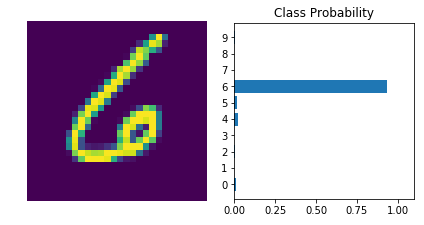

In [28]:
images, labels = next(iter(trainloader))
img = images[1].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)
    
# Output
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)

In [24]:
print("Thank you")

Thankyou
